In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
# Charger les données
data = pd.read_csv('data.csv')

In [4]:
# Afficher les premières lignes pour vérifier le contenu
data.head()

,date,revenue,rd_spending
0,9/30/2024,9825,735
1,6/30/2024,9559,711
2,3/31/2024,9370,702
3,12/31/2023,8833,673
4,9/30/2023,8542,657


In [5]:
# Calculer la corrélation entre deux colonnes
correlation = data['revenue'].corr(data['rd_spending'])

In [6]:
print(f"The correlation coefficient between revenue and rd_spending is: {correlation}")

The correlation coefficient between revenue and rd_spending is: 0.9916817951315008


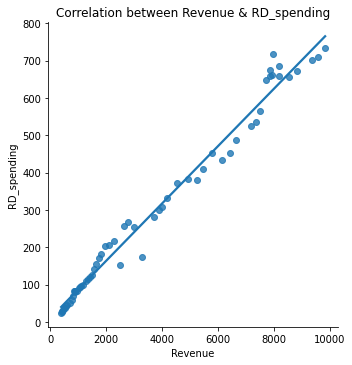

In [7]:
# Nuage de points avec une ligne de régression
sns.lmplot(x='revenue', y='rd_spending', data=data, ci=None)
plt.title("Correlation between Revenue & RD_spending")
plt.xlabel("Revenue")
plt.ylabel("RD_spending")
plt.show()

In [11]:
# Means of the variables
x_mean = data['rd_spending'].mean()
y_mean = data['revenue'].mean()

# Calculate slope (a)
numerator = np.sum((data['rd_spending'] - x_mean) * (data['revenue'] - y_mean))
denominator = np.sum((data['rd_spending'] - x_mean) ** 2)
a = numerator / denominator  # Slope

# Calculate intercept (b)
b = y_mean - a * x_mean  # Intercept

print(f"Slope (a): {a:.2f}")
print(f"Intercept (b): {b:.2f}")

Slope (a): 12.79
Intercept (b): -64.20


In [12]:
slope, intercept, r_value, p_value, std_err = linregress(data['rd_spending'], data['revenue'])

print(f"Scipy Slope (a): {slope:.2f}")
print(f"Scipy Intercept (b): {intercept:.2f}")

Scipy Slope (a): 12.79
Scipy Intercept (b): -64.20


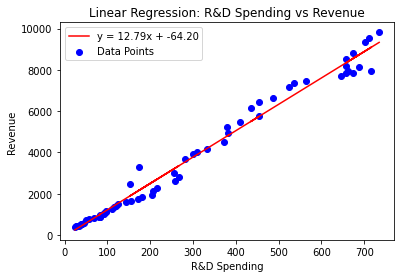

In [13]:
# Regression line equation
x = data['rd_spending']
y_pred = a * x + b  # Predicted values of revenue

# Plot
plt.scatter(data['rd_spending'], data['revenue'], color='blue', label='Data Points')
plt.plot(data['rd_spending'], y_pred, color='red', label=f"y = {a:.2f}x + {b:.2f}")
plt.xlabel('R&D Spending')
plt.ylabel('Revenue')
plt.title('Linear Regression: R&D Spending vs Revenue')
plt.legend()
plt.show()
